# Run An Odds Ratio

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/odds_ratios'

Import Data

In [2]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.xlsx'
sheet = 'master_list_proper_subjects'

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T,Amnesia_Lesion_T_Map,...,Abs_Cognitive_Improve,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,56.864683,0.447264,...,-6.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,52.970984,0.436157,...,-8.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,62.459631,0.497749,...,-15.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,59.611631,0.432617,...,-22.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,57.928350,0.193389,...,-2.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,211,58.7,NaN,NaN,NaN,NaN,-0.415745,-0.189000,19.900000,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,152,69.4,NaN,NaN,NaN,NaN,-0.701419,-0.455000,17.900000,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,208,79.2,NaN,NaN,NaN,NaN,-0.929958,-0.669000,16.300000,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,223,71.1,NaN,NaN,NaN,NaN,-0.829972,-0.575000,17.000000,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T',
       'Amnesia_Lesion_T_Map', 'Memory_Network_T', 'Z_Scored_Memory_Network_R',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Z_Score_Sign',
       'Subiculum_Group_By_Infl

In [5]:
drop_list = ['StimMatch', 'Cognitive_Baseline', 'Cognitive_Score_1_Yr']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T,Amnesia_Lesion_T_Map,...,Abs_Cognitive_Improve,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,56.864683,0.447264,...,-6.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,52.970984,0.436157,...,-8.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,62.459631,0.497749,...,-15.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,59.611631,0.432617,...,-22.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,57.928350,0.193389,...,-2.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,86,57.0,NaN,0.598787,-0.099428,0.000000,-0.087220,-0.621000,22.200000,NaN,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,87,65.0,NaN,0.598787,-0.099428,0.000000,0.598397,0.173000,27.000000,NaN,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,88,65.0,NaN,5.854050,2.637141,15.384615,0.269872,-0.207000,24.700000,NaN,...,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,89,67.0,NaN,0.598787,-0.099428,0.000000,-0.158639,-0.694000,21.700000,NaN,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [7]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T',
       'Amnesia_Lesion_T_Map', 'Memory_Network_T', 'Z_Scored_Memory_Network_R',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Z_Score_Sign',
       'Subiculum_Group_By_Infl

Set the parameters for dropping rows

In [8]:
column = 'City'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'BWH' # The value to drop if found

In [9]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T,Amnesia_Lesion_T_Map,...,Abs_Cognitive_Improve,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,56.864683,0.447264,...,-6.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,52.970984,0.436157,...,-8.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,62.459631,0.497749,...,-15.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,59.611631,0.432617,...,-22.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,57.928350,0.193389,...,-2.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,86,57.0,NaN,0.598787,-0.099428,0.000000,-0.087220,-0.621000,22.200000,NaN,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,87,65.0,NaN,0.598787,-0.099428,0.000000,0.598397,0.173000,27.000000,NaN,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,88,65.0,NaN,5.854050,2.637141,15.384615,0.269872,-0.207000,24.700000,NaN,...,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,89,67.0,NaN,0.598787,-0.099428,0.000000,-0.158639,-0.694000,21.700000,NaN,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Invert Distributions**

In [8]:
from calvin_utils.statistical_utils.distribution_statistics import invert_distribution
mask = data_df['City'] == 'Toronto'
data_df.loc[mask, ['Cognitive_Baseline']] = invert_distribution(data_df.loc[mask, ['Cognitive_Baseline']])

mask = data_df['City'] == 'Queensland'
data_df.loc[mask, ['Cognitive_Baseline']] = invert_distribution(data_df.loc[mask, ['Cognitive_Baseline']])

mask = data_df['City'] == 'Toronto'
data_df.loc[mask, ['Cognitive_Score_1_Yr']] = invert_distribution(data_df.loc[mask, ['Cognitive_Score_1_Yr']])

mask = data_df['City'] == 'Queensland'
data_df.loc[mask, ['Cognitive_Score_1_Yr']] = invert_distribution(data_df.loc[mask, ['Cognitive_Score_1_Yr']])


/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.m

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [92]:
# Remove anything you don't want to standardize
cols_not_to_standardize = None #['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Standard Columns by Mask

In [136]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def mask_and_zscore(df, mask_column, zscore_columns, reference_column=None):
    """
    For a given DataFrame, create a mask based on the unique values of a specified column. 
    Then, for each column in a provided list, replace the values with z-scored counterparts 
    using only the indices corresponding to the mask.

    Parameters:
    - df (pandas.DataFrame): The DataFrame to operate on.
    - mask_column (str): The column name to use for creating the mask based on its unique values.
    - zscore_columns (list): A list of column names for which the values will be replaced with their z-scored counterparts.

    Returns:
    - pandas.DataFrame: The modified DataFrame with specified columns z-scored within the mask.
    """

    # Create a mask from unique values in the specified column
    unique_values = df[mask_column].unique()
    if reference_column is not None:
        for cohort in unique_values:
            mask = df[mask_column] == cohort

            for column in zscore_columns:
                if column in df.columns:
                    # Use dropna() to ensure no NaNs interfere, though you mentioned there are none
                    cohort_values = df.loc[mask, column].dropna()
                    reference_values = df.loc[mask, reference_column].dropna() if reference_column else cohort_values

                    mean_reference = reference_values.mean()
                    std_reference = reference_values.std()

                    if std_reference > 0:  # Ensuring standard deviation is not zero
                        z_scores = (cohort_values - mean_reference) / std_reference
                        df.loc[mask, column] = z_scores
                    else:
                        # Handle the case where std is 0, if needed, such as assigning a default value
                        pass
                else:
                    print(f"Column '{column}' not found in DataFrame.")

        # for cohort in unique_values:
        #     mask = df[mask_column] == cohort

        #     # For each column in the list, replace values with z-scored counterparts within the mask
        #     for column in zscore_columns:
        #         if column in df.columns:
        #             # Compute z-scores for the masked subset of the column
        #             z_scores = (df.loc[mask, [column]] - np.mean(df.loc[mask, [reference_column]])) / np.std(df.loc[mask, [reference_column]])
        #             # Replace the original values with z-scores within the mask
        #             df.loc[mask, column] = z_scores
        #         else:
        #             print(f"Column '{column}' not found in DataFrame.")
        
    else:
        for cohort in unique_values:
            mask = df[mask_column] == cohort

            # For each column in the list, replace values with z-scored counterparts within the mask
            for column in zscore_columns:
                if column in df.columns:
                    # Compute z-scores for the masked subset of the column
                    z_scores = (df.loc[mask, [column]] - np.mean(df.loc[mask, [column]])) / np.std(df.loc[mask, [column]])
                    # Replace the original values with z-scores within the mask
                    df.loc[mask, column] = z_scores
                else:
                    print(f"Column '{column}' not found in DataFrame.")

    return df

In [137]:
data_df['Cognitive_Baseline'].isna().sum()
data_df['Cognitive_Score_1_Yr'].isna().sum()

0

In [149]:
df2 = mask_and_zscore(data_df.copy(), mask_column='City', zscore_columns=['Cognitive_Score_1_Yr'])#, reference_column='Cognitive_Baseline')
df2['Cognitive_Score_1_Yr']
df2 = mask_and_zscore(df2, mask_column='City', zscore_columns=['Cognitive_Baseline'])
df2['Cognitive_Baseline']

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(

0     -1.535547
1     -0.470695
2      0.061731
3      0.416681
4      0.061731
         ...   
160    -1.19359
161   -0.516457
162    1.514941
163   -0.516457
164    0.160676
Name: Cognitive_Baseline, Length: 154, dtype: object

Normalize Data

In [193]:
for category in data_df['City'].unique():
    print(category)
    
import pandas as pd

def normalize_column(df, col_to_normalize, mask_col, reference_col=None):
    """
    Normalize a column between 0 and 1, taking into account whether higher values are better or worse,
    depending on the mask column values.
    
    Args:
        df (pandas.DataFrame): The input DataFrame.
        col_to_normalize (str): The name of the column to normalize.
        mask_col (str): The name of the column to use for masking.
    
    Returns:
        pandas.DataFrame: The DataFrame with the normalized column.
    """
    # Copy the DataFrame to avoid modifying the original data
    df_copy = df.copy()
    
    for mask_val in df_copy[mask_col].unique():
        mask = df_copy[mask_col] == mask_val

        col_min = df_copy.loc[mask, col_to_normalize].min() if reference_col is None else df_copy.loc[mask, reference_col].min() 
        col_max = df_copy.loc[mask, col_to_normalize].max() if reference_col is None else df_copy.loc[mask, reference_col].max() 

        df_copy.loc[mask, col_to_normalize] = (df_copy.loc[mask, col_to_normalize] - col_min) / (col_max - col_min)

    return df_copy


Toronto
Wurzburg
Boston
Queensland


In [194]:
data_df = normalize_column(df=data_df, col_to_normalize='Cognitive_Score_1_Yr', mask_col='City', reference_col='Cognitive_Baseline')
data_df = normalize_column(df=data_df, col_to_normalize='Cognitive_Baseline', mask_col='City')

data_df['Cognitive_Score_1_Yr']

0      0.560000
1      0.720000
2      0.560000
3      0.360000
4      1.080000
         ...   
160    0.000000
161    0.142857
162    0.000000
163    0.142857
164    0.142857
Name: Cognitive_Score_1_Yr, Length: 154, dtype: float64

Categorize Values

In [122]:
import numpy as np

# Define conditions
conditions = [
    df2['Cognitive_Baseline'] > 2,  # Values over 2
    df2['Cognitive_Baseline'] < -2  # Values under -2
]

# Define choices corresponding to the conditions
choices = [
    1,  # Choice for values over 2
    -1  # Choice for values under -2
]

# Apply conditions and choices, default value is 0 for values between -2 and 2
df2['Cognitive_Baseline'] = np.select(conditions, choices, default=0)


RCT Plotter

In [167]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T',
       'Amnesia_Lesion_T_Map', 'Memory_Network_T', 'Z_Scored_Memory_Network_R',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Z_Score_Sign',
       'Subiculum_Group_By_Infl

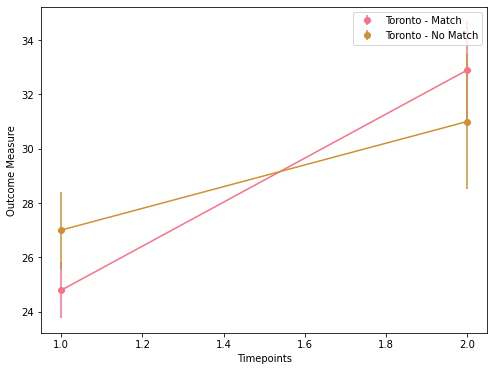

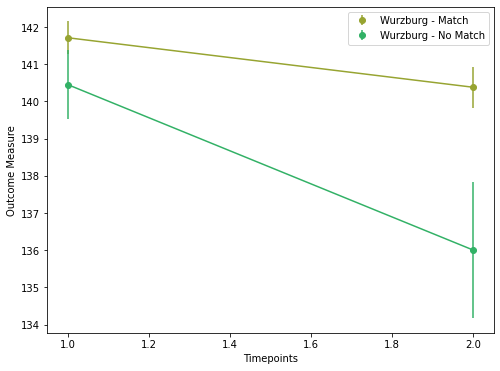

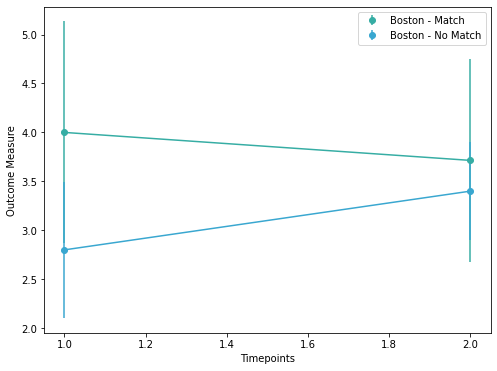

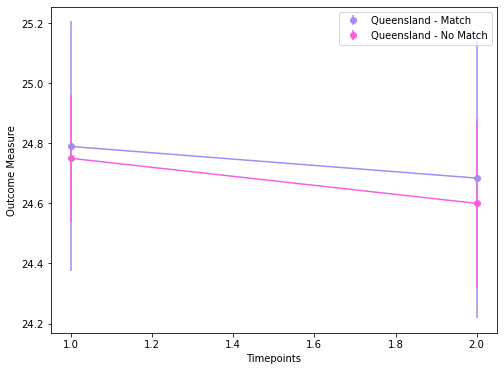

Timepoint 1:
  Toronto - Match vs No Match: t-statistic=-1.30, p-value=0.2016
  Toronto - Match vs No Match: welch-statistic=-1.30, p-value=0.2016
  Toronto - Match vs No Match: u-statistic=-1.42, p-value=0.1562
  Toronto - No Match vs Match: t-statistic=1.30, p-value=0.2016
  Toronto - No Match vs Match: welch-statistic=1.30, p-value=0.2016
  Toronto - No Match vs Match: u-statistic=1.42, p-value=0.1562
  Wurzburg - Match vs No Match: t-statistic=1.41, p-value=0.1690
  Wurzburg - Match vs No Match: welch-statistic=1.41, p-value=0.1690
  Wurzburg - Match vs No Match: u-statistic=0.99, p-value=0.3212
  Wurzburg - No Match vs Match: t-statistic=-1.41, p-value=0.1690
  Wurzburg - No Match vs Match: welch-statistic=-1.41, p-value=0.1690
  Wurzburg - No Match vs Match: u-statistic=-0.99, p-value=0.3212
  Boston - Match vs No Match: t-statistic=0.95, p-value=0.3549
  Boston - Match vs No Match: welch-statistic=0.95, p-value=0.3549
  Boston - Match vs No Match: u-statistic=0.73, p-value=0.464

In [10]:
from calvin_utils.statistical_utils.rct import RCTPlotter

# Initialize the RCTPlotter
plotter = RCTPlotter(data=data_df, obs_cols=['Cognitive_Baseline', 'Cognitive_Score_1_Yr'], arm_col='StimMatch', category_col='City', out_dir='/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/supplement_pseudo_rct')

# Run the RCTPlotter and display the plot
plotter.run()

Differe in Differences Plotter

In [ ]:
data_df.columns

In [ ]:
from calvin_utils.statistical_utils.rct import DiDAnalysis
analysis = DiDAnalysis(data=data_df, obs_cols=['Cognitive_Baseline', 'Cognitive_Score_1_Yr'], arm_col='StimMatch', category_col='City')

# Run the DiDAnalysis and display the plot
analysis.run()

Propensity Stratification Match

In [ ]:
data_df.columns

In [ ]:
from calvin_utils.statistical_utils.rct import PropensityStratifiedRCTPlotter
ps_rct_plotter = PropensityStratifiedRCTPlotter(data=data_df, obs_cols=['Cognitive_Baseline', 'Cognitive_Score_1_Yr'], arm_col='StimMatch', covariate_cols=['Age', 'Cognitive_Baseline'], n_strata=2)
ps_rct_plotter.run()